In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [2]:
StudentPerformance = pd.read_csv('StudentsPerformance.csv')
StudentPerformance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [3]:
StudentPerformance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EA7C574EB8>,
      dtype=object)

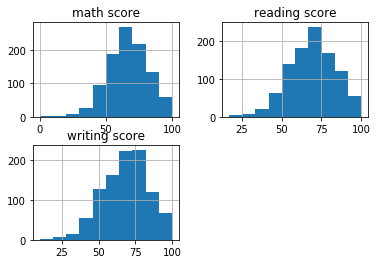

In [4]:
StudentPerformance.hist()

In [5]:
# generate a columns of sum of all scores
StudentPerformance['Totals']= StudentPerformance['math score'] + StudentPerformance['reading score']+ StudentPerformance['writing score']

In [6]:
# create a function to extract mean and std
def get_mean_std(x,y):
    from numpy import std
    mean_score = StudentPerformance.groupby(x)[y].mean()
    std_score = StudentPerformance.groupby(x)[y].std()
    return mean_score, std_score

In [7]:
## compare the performance for each catogory and get std
## raw data
gender_com,gender_std = get_mean_std('gender', 'Totals')
race_com,race_std= get_mean_std('race/ethnicity', 'Totals')
patedu_com,patedu_std= get_mean_std('parental level of education', 'Totals')
lunch_com,lunch_std = get_mean_std('lunch', 'Totals')
pre_com,pre_std = get_mean_std('test preparation course', 'Totals')

Text(0.5,1,'Total Mean Socre by Genders')

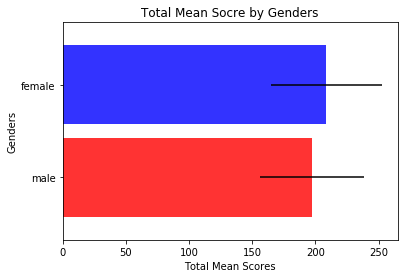

In [8]:
gender_com.sort_values(ascending=True, inplace=True)
gender_com.plot(kind='barh',color=['r','b'],width=0.85,alpha=0.8,xerr=gender_std)

plt.ylabel('Genders')
plt.xlabel('Total Mean Scores')
plt.title('Total Mean Socre by Genders')


Text(0.5,0,'Total Mean Score')

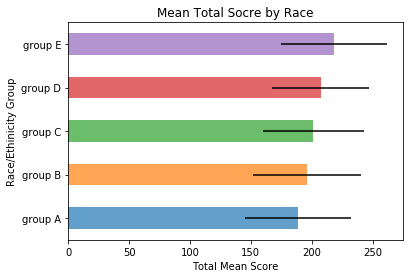

In [9]:
race_com.plot(kind='barh', alpha=0.7,xerr=race_std)

plt.title('Mean Total Socre by Race')
plt.ylabel('Race/Ethinicity Group')
plt.xlabel('Total Mean Score')

Text(0.5,1,'Mean Total Score by Parent Education Level')

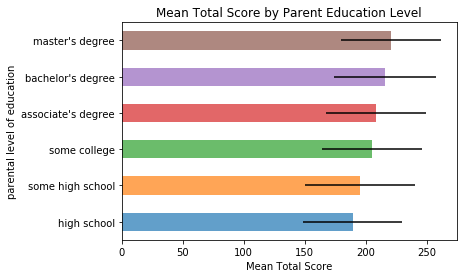

In [10]:
# sort the value and plot the barh
patedu_com.sort_values(ascending=True, inplace=True)
patedu_com.plot(kind='barh',xerr=patedu_std, alpha=0.7)

plt.xlabel('Mean Total Score')
plt.title('Mean Total Score by Parent Education Level')

Text(0.5,1,'Mean Total Score by Lunch Received')

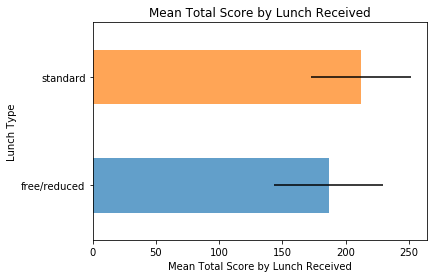

In [11]:
lunch_com.plot(kind='barh', xerr=lunch_std, alpha=0.7)

plt.xlabel('Mean Total Score by Lunch Received')
plt.ylabel('Lunch Type')
plt.title('Mean Total Score by Lunch Received')

Text(0.5,0,'Mean Total Score by Preparation Courses')

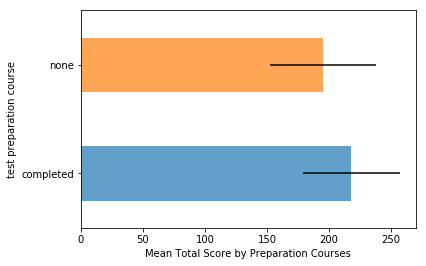

In [12]:
pre_com.plot(kind='barh', xerr=pre_std, alpha=0.7)

plt.xlabel('Mean Total Score by Preparation Courses')

In [13]:
## administrate T-Test
def t_test(df,cat_col, val_col):
    from statsmodels.stats.weightstats import ttest_ind
    cat = df[cat_col].unique()  # name of categories
    other = []  # rest of categories
    used=[]
    for i in cat[:-1]:
        used.extend([i])
        other= [x for x in cat if x not in used]
        for j in other:
            a = df[val_col][df[cat_col]==i].values
            b = df[val_col][df[cat_col]==j].values
            tval, pval, dfree = ttest_ind(a,b)
            print(' T value: %f, P value: %f , Degree of Freedom: %f' %(tval, pval, dfree)) #
    
     

In [14]:
t_test(StudentPerformance,'gender','Totals')

 T value: 4.169914, P value: 0.000033 , Degree of Freedom: 998.000000


In [15]:
t_test(StudentPerformance,'parental level of education','Totals')

 T value: 2.200747, P value: 0.028422 , Degree of Freedom: 342.000000
 T value: -0.759477, P value: 0.448589 , Degree of Freedom: 175.000000
 T value: 1.501301, P value: 0.134211 , Degree of Freedom: 338.000000
 T value: 5.539324, P value: 0.000000 , Degree of Freedom: 312.000000
 T value: 3.941855, P value: 0.000101 , Degree of Freedom: 295.000000
 T value: -2.559652, P value: 0.010998 , Degree of Freedom: 283.000000
 T value: -0.844579, P value: 0.398799 , Degree of Freedom: 446.000000
 T value: 4.047081, P value: 0.000062 , Degree of Freedom: 420.000000
 T value: 2.356278, P value: 0.018937 , Degree of Freedom: 403.000000
 T value: 2.014635, P value: 0.044902 , Degree of Freedom: 279.000000
 T value: 5.226505, P value: 0.000000 , Degree of Freedom: 253.000000
 T value: 3.859155, P value: 0.000147 , Degree of Freedom: 236.000000
 T value: 4.856827, P value: 0.000002 , Degree of Freedom: 416.000000
 T value: 3.111675, P value: 0.001994 , Degree of Freedom: 399.000000
 T value: -1.3667

In [16]:
# Data Washing
StudentPerformance.replace({'gender':{'male':int(1),'female':int(2)}}, inplace=True)
StudentPerformance.replace({'race/ethnicity':{'group A':int(1),'group B':int(2),'group C':int(3),
                                             'group D': int(4),'group E': int(5)}}, inplace=True)
StudentPerformance.replace({"parental level of education":{'high school':int(1), 'some high school':int(2),
                                                           'some college': int(3),
                                                          "associate's degree":int(4),
                                                          "bachelor's degree": int(5),
                                                          "master's degree": int(6)}}, inplace=True)
StudentPerformance.replace({'lunch':{'free/reduced':int(1),'standard':int(2)}}, inplace=True)
StudentPerformance.replace({'test preparation course':{'none':1,'completed':2}}, inplace=True)

In [17]:
StudentPerformance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Totals
0,2,2,5,2,1,72,72,74,218
1,2,3,3,2,2,69,90,88,247
2,2,2,6,2,1,90,95,93,278
3,1,1,4,1,1,47,57,44,148
4,1,3,3,2,1,76,78,75,229


In [18]:
X_temp=StudentPerformance[StudentPerformance.columns[:-3]].values
y_temp=StudentPerformance['Totals'].values

In [19]:
# obtaining training & testing data
from sklearn.model_selection import train_test_split, GridSearchCV

X_train,X_test, y_train,y_test = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

In [20]:
# training model
dt_reg=DecisionTreeRegressor()

param_grid = [{'criterion':['mse','friedman_mse'], 'max_depth':[2,3,4]}]

grid_search = GridSearchCV(dt_reg, param_grid, cv=3, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'criterion': ['mse', 'friedman_mse'], 'max_depth': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [21]:
grid_search.best_params_

{'criterion': 'mse', 'max_depth': 4}

In [22]:
dt_reged=DecisionTreeRegressor(criterion='mse', max_depth=4)

dt_reged.fit(X_train,y_train)

y_pred=dt_reged.predict(X_test)

mean_squared_error(y_test,y_pred)

193.14277510867439

In [ ]:
## to be continue